# Necessary Packages

In [519]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('monokai','notebook',ticks=True)

# Function to fetch the all Pull Requests along with their links from Rotten Scripts Repo

In [758]:
prs=[]
no=[]
info=[]
pr_title=[]
for x in range(1,29):
    r=requests.get(url="https://github.com/HarshCasper/Rotten-Scripts/pulls?page="+str(x)+"&q=is%3Apr")
    soup=BeautifulSoup(r.content,'html.parser')
    div_tags=soup.findAll('div',class_="Box-row Box-row--focus-gray p-0 mt-0 js-navigation-item js-issue-row")
    base_url="https://github.com/"
    for _,i in enumerate(div_tags):
        for a in i.findAll('a'):
            newUrl=base_url+a["href"]
        no.append(_)
        info.append(i.text.strip())
        prs.append(newUrl)
for item in info:
    pr_title.append(re.sub("\n","",item))

# Converting the fetched information into a Python DataFrame

In [ ]:
data=list(zip(no,pr_title,prs))
df=pd.DataFrame(data,columns=["No","Info","PR Url"])
for i in range(len(df)):
    df['No'][i]=i

C:\Users\adity\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,No,Info,PR Url
0,0,This fixes #1195 wontfix ...,https://github.com//HarshCasper/Rotten-Scripts...
1,1,This Fixes #1203 invalid ...,https://github.com//HarshCasper/Rotten-Scripts...
2,2,This fixes #1195 duplicate ...,https://github.com//HarshCasper/Rotten-Scripts...
3,3,this fixes #1195 PR:Ready-to-Re...,https://github.com//HarshCasper/Rotten-Scripts...
4,4,certificate app using streamlit ...,https://github.com//HarshCasper/Rotten-Scripts...
...,...,...,...
693,693,RSA Key Pair Generator #4 #20 ...,https://github.com//HarshCasper/Rotten-Scripts...
694,694,Download Instagram post images #16 ...,https://github.com//HarshCasper/Rotten-Scripts...
695,695,Initialize HTTP server #9 #15 ...,https://github.com//HarshCasper/Rotten-Scripts...
696,696,Lorem Ipsum Text Generator #2 #7 ...,https://github.com//HarshCasper/Rotten-Scripts...


# (Experimental Section)
## This section contains function to fetch comments from each and every PR. 

 ***NEEDS MORE WORK****

In [ ]:

def pr_comments_extractor(link):
    comments=[]
    comments_collection=[]
    r=requests.get(url=link)
    soup=BeautifulSoup(r.content,'html.parser')
    div_tags=soup.findAll('div',class_="TimelineItem pt-0")
    for _,i in enumerate(div_tags):
        for td in i.findChild('td',class_="d-block"):
            print(td)
            comments.append(td)
        comments_collection.append(comments)
        
    return comments,comments_collection

In [ ]:
comments,comment_collention=pr_comments_extractor(df['PR Url'][1])



<p>Review Round (1)</p>




In [ ]:
comment_collention

[[]]

In [ ]:
comments

['\n',
 <p>I don't see any utility for this.</p>,
 '\n',
 <p>Kindly go through the purpose of the project before you start contributing to it.</p>,
 '\n']

# Function to Fetch the status of each and every PR
* The function returns the status by stating if the PR is "open", "closed" or "merged"

In [ ]:
#tells the status of the PR
def pr_status(link):
    contributors=[]
    status=[]
    r=requests.get(url=link)
    soup=BeautifulSoup(r.content,'html.parser')
    div_tags=soup.findAll('div',class_="flex-shrink-0 mb-2 flex-self-start flex-md-self-center")
    for _,i in enumerate(div_tags):
        for span in i.findChild('span'):
            status.append(span)
    status=re.sub('\n','',status[-1])
    status=re.sub(' ','',status)
    return str(status)



#  Adding 'PR Status' columnm to the DataFrame

In [ ]:
status=[]

In [ ]:
#add all the PR status to the dataframe

for i in range(len(df)):
    print(i)
    status.append(pr_status(df['PR Url'][i]))


675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697


In [ ]:
len(status)

698

In [ ]:
df['PR Status']=status
df

,No,Info,PR Url,PR Status
0,0,This fixes #1195 wontfix ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed
1,1,This Fixes #1203 invalid ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed
2,2,This fixes #1195 duplicate ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed
3,3,this fixes #1195 PR:Ready-to-Re...,https://github.com//HarshCasper/Rotten-Scripts...,Closed
4,4,certificate app using streamlit ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed
...,...,...,...,...
693,693,RSA Key Pair Generator #4 #20 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged
694,694,Download Instagram post images #16 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged
695,695,Initialize HTTP server #9 #15 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged
696,696,Lorem Ipsum Text Generator #2 #7 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged


# Function which fetches the names of contributors from each pull request


In [ ]:
#funtion to fetch the contributors name from each pull request
def pr_names(link):
    name=[]
    r=requests.get(url=link)
    soup=BeautifulSoup(r.content,'html.parser')
    div_tags=soup.findAll('div',class_="participation")
    for _,i in enumerate(div_tags):
        for a in i.findAll('a'):
            name.append(re.sub('/' ,"",a['href']))
    return name

pr_contributors=[]

for i in range(len(df)):
    pr_contributors.append(pr_names(df['PR Url'][i]))

In [ ]:
df['PR Contributors']=pr_contributors
df

,No,Info,PR Url,PR Status,PR Contributors
0,0,This fixes #1195 wontfix ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed,"[whyadiwhy, HarshCasper]"
1,1,This Fixes #1203 invalid ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed,"[whyadiwhy, HarshCasper]"
2,2,This fixes #1195 duplicate ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed,"[whyadiwhy, HarshCasper]"
3,3,this fixes #1195 PR:Ready-to-Re...,https://github.com//HarshCasper/Rotten-Scripts...,Closed,[whyadiwhy]
4,4,certificate app using streamlit ...,https://github.com//HarshCasper/Rotten-Scripts...,Closed,"[HeyAnirudh, kskrao219, HarshCasper]"
...,...,...,...,...,...
693,693,RSA Key Pair Generator #4 #20 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[mbcse, HarshCasper]"
694,694,Download Instagram post images #16 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[sanket143, HarshCasper]"
695,695,Initialize HTTP server #9 #15 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[seema1711, HarshCasper]"
696,696,Lorem Ipsum Text Generator #2 #7 ...,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[seema1711, HarshCasper]"


# Flushing the Pandas DataFrame to a CSV file.

In [ ]:
df.to_csv('pr_info.csv')

# PR Status Glimpse along with a graph

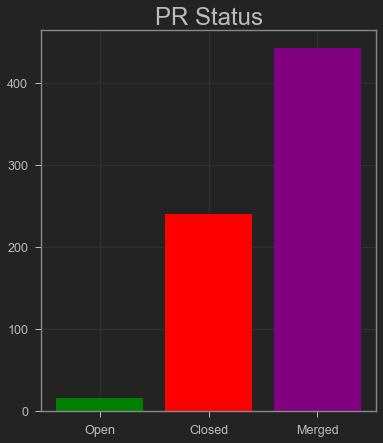

In [759]:
colors=['green','red','purple']
plt.figure(figsize=(6,7))
plt.bar(
    ["Open","Closed","Merged"],
    height=[len(df[df['PR Status']=='Open']),len(df[df['PR Status']=='Closed']),len(df[df['PR Status']=='Merged'])],
    width=0.8,
    color=colors,
    zorder=2
)
plt.title('PR Status',fontsize=24)
plt.grid(zorder=1)
plt.show()

##  Function to get all the names of the contributors by removing all the duplicate values


In [ ]:
#This function gets all the names of the contributors by removing all the duplicate values
def pr_contributors_list(list):
    pr_contributors_unique=[]
    for x in list:
        for y in x:
            if y not in pr_contributors_unique:
                condition = y not in pr_contributors_unique
                pr_contributors_unique.append(y)
    return pr_contributors_unique
            
pr_contributors_unique=pr_contributors_list(pr_contributors)
print(pr_contributors_unique)

['whyadiwhy', 'HarshCasper', 'HeyAnirudh', 'kskrao219', 'Amankesarwani2202', 'Umesh-01', 'Sukriti-sood', 'rutujaingole', 'realhunter7869', 'AliHaider20', 'cclauss', 'YashKandalkar', 'RohiniRG', 'kookee1226', 'iamakkkhil', 'Cosine42', 'sumitgsh', 'kadatatlukishore', 'vybhav72954', 'CYB3R-G0D', 'SuryanshNaugraiya', 'raghavraj-27', 'YASHIKA791', 'tanvi355', 'Kumaravinash9', 'Pradhuman-singh5', 'shantamsultania', 'thegautamkumarjaiswal', 'Suryadipsinh', 'jayant766', 'venkateshpensalwar', 'prathimacode-hub', 'A-kriti', 'harshita2319', 'N-Shar-ma', 'sohamsshah', 'soumik2012', 'tanishq-arya', 'Manasi2001', 'jhamadhav', 'Yuvraj-kadale', 'fossabot', 'XZANATOL', 'anuragmukherjee2001', 'neha07kumari', 'ShubhamGupta577', 'sayantani11', 'devRawnie', 'Jaideep07', 'VanTekken', 'RJ535315', 'NovusEdge', 'rahulraikwar00', 'Naman-1234', 'get-satyam', 'sourabhkumar45', 'piall', 'manas221', 'Dhanush2612', 'anubhav201241', 'aaadddiii', 'pganguli', 'kshittijagrawal', 'DiegoCaraballo', 'BJSwaroop', 'Pretty-19

## Fetching Total number of contributions done by the contributors into a JSON file

In [ ]:
#total number of contributions by each contributor
def contributors_to_json(pr_contributors,pr_contributors_unique):
    import json
    print("Creating JSON file...")
    pr_contributions={}
    for j in range(len(pr_contributors_unique)):
        sum=0
        for i in range(len(pr_contributors)):
            count=pr_contributors[i].count(pr_contributors_unique[j])
            sum+=count
        #print("{}: {}".format(pr_contributors_unique[j],sum))
        pr_contributions[pr_contributors_unique[j]]=sum
    
    with open('Contributors data.json','w') as fp:
        json.dump(pr_contributions,fp)
    
    print("JSON File Created.")

contributors_to_json(pr_contributors,pr_contributors_unique)

Creating JSON file...
JSON File Created.


# Loading JSON file which contains
* ## Contributors 
* ## Total number of contributions to Rotten Scripts repo 

In [ ]:
#load data from json
def total_contributions_count():
    import json
    with open('Contributors data.json') as fp:
        info=json.load(fp)
    return info

info=total_contributions_count()
# from collections import OrderedDict
# info=OrderedDict(sorted(info.items()))


# Top 5 Contributors

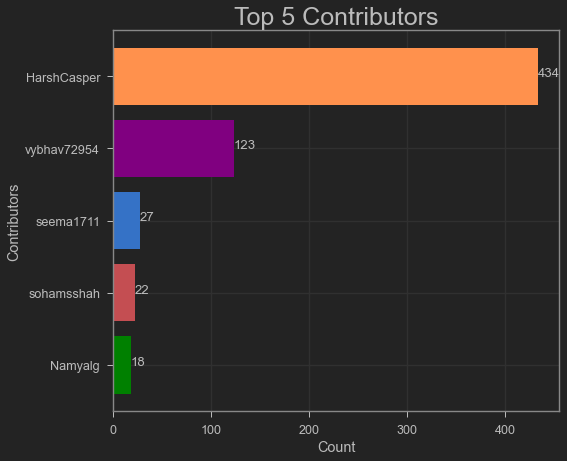

In [ ]:
#plot to show top 5 contributors
colors=['green','r','b','purple','y',]
contributors=list(info.keys())
count=list(info.values())
plt.barh(
    contributors[-5:],
    count[-5:],
    color=colors,
    zorder=2
)
plt.title("Top 5 Contributors",fontsize=25)
plt.xlabel("Count")
plt.ylabel("Contributors")
plt.grid(zorder=1)
for index, value in enumerate(count[-5:]):
    plt.text(value, index,
             str(value))
plt.show()

# Section: PR Average time 


In [612]:
#creating a "merged_df" dataframe which contains only the rows which are merged PR's
merged_df=df[df['PR Status']=="Merged"]
merged_number_list=df[df['PR Status']=="Merged"]["No"].to_list()

https://github.com//HarshCasper/Rotten-Scripts/pull/1207


In [605]:
#function to get the date and time history from a merged PR
def datetime_extractor(url):
    datetime=[]
    r=requests.get(url)
    soup=BeautifulSoup(r.content,'html.parser')
    div_tags=soup.findAll('div',class_="TimelineItem-body")
    for _,i in enumerate(div_tags):
        for a in i.findChildren('a'):
            for rt in a.findChildren('relative-time',class_="no-wrap"):
                datetime.append(rt['datetime'])
    return max(datetime),min(datetime)

In [610]:
#function to calculate the time difference of starting and ending time of every merged PR
import datetime
def merged_pr_active_time(datetime_info):
    datetime_list=[]
    for dates in datetime_info:
        dates=re.sub("T"," ",dates)
        dates=re.sub("Z","",dates)
        dates=re.sub("-","/",dates)
        dates=datetime.datetime.strptime(dates,'%Y/%m/%d %H:%M:%S')
        datetime_list.append(dates)
    maximum=datetime_list[len(datetime_list)-1]
    minimum=datetime_list[0]
    timediff=maximum-minimum
    return timediff


In [585]:
datetime_info=datetime_extractor(df[df['PR Status']=="Merged"]["PR Url"][79])
timediff=merged_pr_active_time(datetime_info)
timediff

datetime.timedelta(days=34, seconds=85337)

In [617]:
#list for storing the time difference of starting and ending time of all the merrged PR's
pr_time=[]

In [644]:
#finding out the start and end time of every merged PR and append to "pr_time()"
for i in merged_number_list[430:443]:
    print(i)
    datetime_info=datetime_extractor(merged_df['PR Url'][i])
    timediff=merged_pr_active_time(datetime_info)
    print(datetime_info)
    pr_time.append(timediff)
    

685
('2020-06-29T03:22:02Z', '2020-06-28T16:45:41Z')
686
('2020-06-29T03:18:49Z', '2020-06-28T16:30:10Z')
687
('2020-06-30T02:40:13Z', '2020-06-28T14:01:04Z')
688
('2020-06-28T03:35:06Z', '2020-06-20T15:06:42Z')
689
('2020-06-27T09:52:45Z', '2020-06-26T12:41:22Z')
690
('2020-06-27T09:58:50Z', '2020-06-26T06:38:12Z')
691
('2020-07-08T11:44:31Z', '2020-06-26T06:52:47Z')
692
('2020-06-27T10:00:30Z', '2020-06-25T12:12:48Z')
693
('2020-06-24T14:58:57Z', '2020-06-24T12:57:42Z')
694
('2020-06-24T10:58:11Z', '2020-06-23T10:43:17Z')
695
('2020-06-22T10:31:52Z', '2020-06-22T10:08:42Z')
696
('2020-09-12T05:02:47Z', '2020-06-20T15:08:26Z')


In [719]:
# adding "Active PR time" values to the dataframe alondg with "PR No" column for reference puposes
merged_df['Active PR Time']=pr_time
merged_df['PR No']=df[df["PR Status"]=="Merged"]['No']
merged_df.No=[x for x in range(len(merged_df))]
merged_df=merged_df[['No','PR No', 'PR Url', 'PR Status', 'PR Contributors', 'Active PR Time']]

In [720]:
#calculating the total number of seconds from the "ACtive PT Time" column
seconds_list=[]
for i in merged_df['PR No']:
    merged_df['Active PR Time'][i]=abs(merged_df['Active PR Time'][i])
    seconds = merged_df['Active PR Time'][i].total_seconds()
    seconds_list.append(abs(seconds))

merged_df['Active time(in Seconds)']=seconds_list
merged_df

C:\Users\adity\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adity\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,No,PR No,PR Url,PR Status,PR Contributors,Active PR Time,Active time(in Seconds)
17,0,17,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[Sukriti-sood, HarshCasper]",0 days 18:45:00,67500.0
18,1,18,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[rutujaingole, HarshCasper]",2 days 23:44:56,258296.0
20,2,20,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[AliHaider20, HarshCasper]",0 days 21:47:13,78433.0
21,3,21,https://github.com//HarshCasper/Rotten-Scripts...,Merged,[HarshCasper],0 days 00:00:47,47.0
23,4,23,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[YashKandalkar, HarshCasper, RohiniRG]",7 days 20:59:40,680380.0
...,...,...,...,...,...,...,...
692,437,692,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[sanket143, HarshCasper]",1 days 21:47:42,164862.0
693,438,693,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[mbcse, HarshCasper]",0 days 02:01:15,7275.0
694,439,694,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[sanket143, HarshCasper]",1 days 00:14:54,87294.0
695,440,695,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[seema1711, HarshCasper]",0 days 00:23:10,1390.0


In [689]:
#save all the merged PR's along with new columns into a csv file format
merged_df.to_csv('merged_PR_active_time.csv')

# Cluster creation using KMeans

In [650]:
#libraries to import KMeans and pyplot
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [749]:
#training the KMEans model with number of clusters to be formed as 3
import numpy as np
model=KMeans(n_clusters=3)
model.fit(np.array(merged_df['Active time(in Seconds)']).reshape(-1,1))
np.random.seed(43)

In [756]:
#to get the centriods of the 2 clusters
model.cluster_centers_

array([[ 259118.49431818],
       [6915384.        ],
       [2391290.07462686]])

In [752]:
#converting "seconds" to "date hour min sec" format
result=[]
for i in model.cluster_centers_:
    seconds=int(i)
    days=seconds//(24*3600)
    seconds%=(24*3600)
    hours=seconds//3600
    seconds%=3600
    minutes=seconds//60
    seconds%=60
    res="{} days {} hours {} minutes {} seconds".format(days,hours,minutes,seconds)
    result.append(res)
    print(res)



2 days 23 hours 58 minutes 38 seconds
80 days 0 hours 56 minutes 24 seconds
27 days 16 hours 14 minutes 50 seconds


In [753]:
#clustered active PR time 
result.sort()
result=pd.DataFrame(result,columns=["Average PR time"])
result

,Average PR time
0,2 days 23 hours 58 minutes 38 seconds
1,27 days 16 hours 14 minutes 50 seconds
2,80 days 0 hours 56 minutes 24 seconds


In [744]:
#save the centroids into a csv file
result.to_csv('average_PR_time(results).csv')

In [757]:
#PR's which have been active more than 80 days
merged_df[merged_df['Active time(in Seconds)']>=6915384]

,No,PR No,PR Url,PR Status,PR Contributors,Active PR Time,Active time(in Seconds)
246,132,246,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[pganguli, HarshCasper, vybhav72954]",92 days 19:54:37,8020477.0
331,183,331,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[vybhav72954, HarshCasper]",98 days 04:04:39,8481879.0
333,185,333,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[Siddhant-K-code, HarshCasper, vybhav72954]",100 days 22:00:06,8719206.0
374,209,374,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[Siddhant-K-code, vybhav72954, HarshCasper]",125 days 13:24:23,10848263.0
583,345,583,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[Namyalg, HarshCasper]",108 days 16:59:34,9392374.0
636,389,636,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[HeroicHitesh, HarshCasper]",166 days 22:47:16,14424436.0
696,441,696,https://github.com//HarshCasper/Rotten-Scripts...,Merged,"[seema1711, HarshCasper]",83 days 13:54:21,7221261.0
